In [17]:
# load vgg model
from keras.applications.vgg16 import VGG16
# load the model
model = VGG16()
# summarize the model
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [18]:
# summarize filters in each convolutional layer
from matplotlib import pyplot
# summarize filter shapes
for layer in model.layers:
	# check for convolutional layer
	if 'conv' not in layer.name:
		continue
	# get filter weights
	filters, biases = layer.get_weights()
	print(layer.name, filters.shape)

block1_conv1 (3, 3, 3, 64)
block1_conv2 (3, 3, 64, 64)
block2_conv1 (3, 3, 64, 128)
block2_conv2 (3, 3, 128, 128)
block3_conv1 (3, 3, 128, 256)
block3_conv2 (3, 3, 256, 256)
block3_conv3 (3, 3, 256, 256)
block4_conv1 (3, 3, 256, 512)
block4_conv2 (3, 3, 512, 512)
block4_conv3 (3, 3, 512, 512)
block5_conv1 (3, 3, 512, 512)
block5_conv2 (3, 3, 512, 512)
block5_conv3 (3, 3, 512, 512)


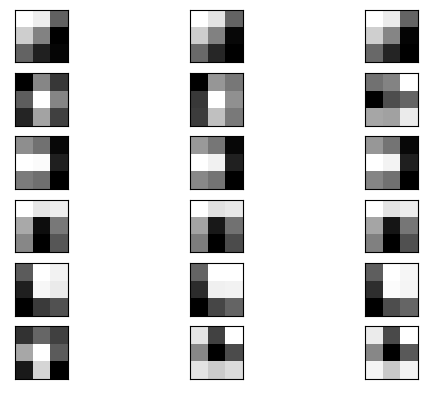

In [19]:
from keras.applications.vgg16 import VGG16
from matplotlib import pyplot
# retrieve weights from the second hidden layer
filters, biases = model.layers[1].get_weights()
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
# plot first few filters
n_filters, ix = 6, 1
for i in range(n_filters):
	# get the filter
	f = filters[:, :, :, i]
	# plot each channel separately
	for j in range(3):
		# specify subplot and turn of axis
		ax = pyplot.subplot(n_filters, 3, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(f[:, :, j], cmap='gray')
		ix += 1
# show the figure
pyplot.show()

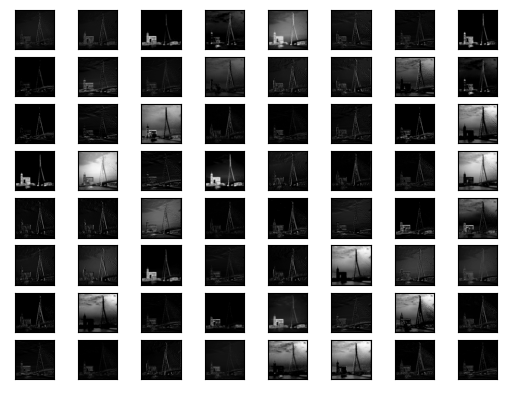

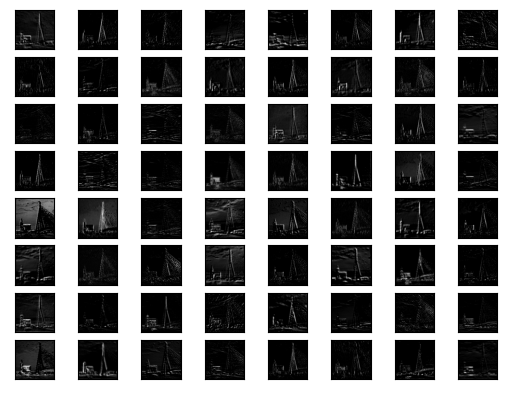

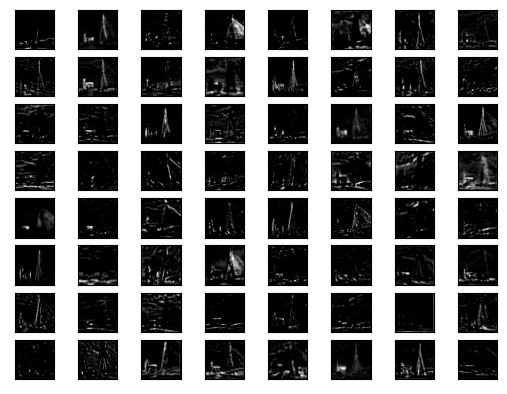

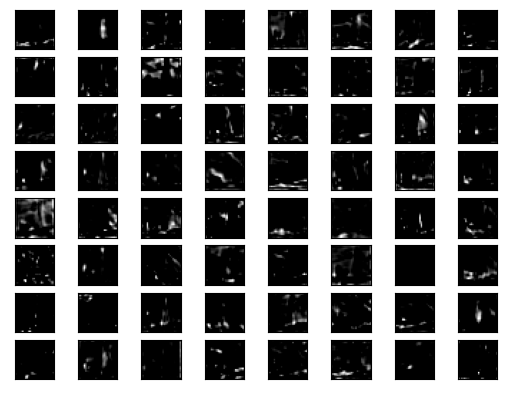

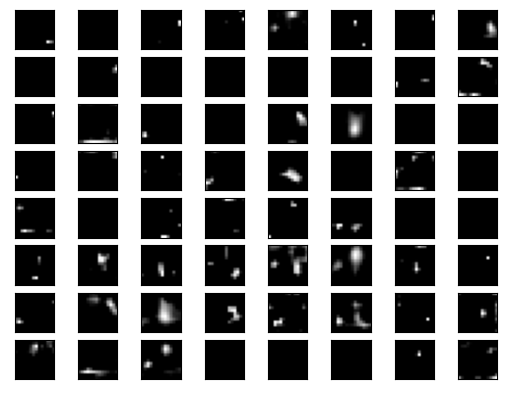

[array([[[[4.7154501e+02, 3.7593540e+01, 0.0000000e+00, ...,
          1.5699944e+02, 3.2185904e+02, 7.2075638e+01],
         [1.4721413e+02, 5.5143154e+01, 0.0000000e+00, ...,
          2.8263531e+02, 1.6878752e+02, 0.0000000e+00],
         [1.9975554e+02, 6.6765160e+01, 0.0000000e+00, ...,
          2.8495337e+02, 1.0588398e+02, 0.0000000e+00],
         ...,
         [1.7916753e+02, 6.6041023e+01, 0.0000000e+00, ...,
          3.6654465e+02, 7.0599060e+01, 0.0000000e+00],
         [5.7225727e+01, 0.0000000e+00, 0.0000000e+00, ...,
          3.2727814e+02, 1.8798491e+02, 1.0364212e+01],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          1.8658168e+02, 0.0000000e+00, 0.0000000e+00]],

        [[1.9473555e+02, 5.0675762e+01, 0.0000000e+00, ...,
          2.5452284e+02, 1.9757933e+02, 0.0000000e+00],
         [0.0000000e+00, 4.9229794e+01, 0.0000000e+00, ...,
          4.2333170e+02, 2.8689795e+02, 0.0000000e+00],
         [6.3719749e-01, 6.5745605e+01, 0.0000000e+00, 

In [20]:

# visualize feature maps output from each block in the vgg model
from keras.applications.vgg16 import VGG16
# from keras.utils import load_img
# from keras.utils import img_to_array
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims
import PIL
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
import keras.preprocessing
# load the model





model = VGG16()
# redefine model to output right after the first hidden layer
ixs = [2, 5, 9, 13, 17]
outputs = [model.layers[i].output for i in ixs]
model = Model(inputs=model.inputs, outputs=outputs)
# load the image with the required shape

img = load_img('brug.jpg', target_size= (224, 224))
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
#img = preprocess_input(img)
# get feature map for first hidden layer
feature_maps = model.predict(img[:1])
# plot the output from each block
square = 8
for fmap in feature_maps:
	# plot all 64 maps in an 8x8 squares
	ix = 1
	for _ in range(square):
		for _ in range(square):
			# specify subplot and turn of axis
			ax = pyplot.subplot(square, square, ix)
			ax.set_xticks([])
			ax.set_yticks([])
			# plot filter channel in grayscale
			pyplot.imshow(fmap[0, :, :, ix-1], cmap='gray')
			ix += 1
	# show the figure
	pyplot.show()

print(feature_maps)

In [22]:
from keras.applications import vgg16
model = vgg16.VGG16()
predict_img = model.predict(img)
predict_img


array([[7.41307673e-08, 6.74661010e-07, 4.31003429e-07, 2.70040118e-07,
        1.33293508e-06, 4.33927380e-06, 5.01719455e-07, 2.66082952e-06,
        5.55990880e-07, 2.52617315e-06, 1.02191542e-07, 6.25241015e-08,
        1.70817387e-07, 7.00433773e-08, 1.07606422e-06, 6.86523336e-08,
        1.11927072e-07, 4.90293723e-06, 1.18431146e-07, 5.01705806e-08,
        1.30454652e-07, 2.61678679e-07, 8.93117260e-08, 1.23170864e-07,
        2.74726535e-08, 8.72577957e-08, 7.97919313e-07, 1.98918286e-07,
        3.96481674e-08, 6.39169969e-07, 3.99853064e-07, 4.51070612e-08,
        4.25197101e-07, 4.12301517e-07, 8.67783456e-07, 1.50837565e-07,
        5.29329384e-07, 4.20386286e-08, 1.89202424e-07, 8.63259345e-07,
        1.30829548e-07, 3.53149147e-07, 3.89853813e-06, 2.32869269e-07,
        3.46918597e-07, 1.93735247e-07, 6.42663736e-07, 3.33694720e-06,
        4.56129442e-07, 9.46431896e-07, 1.53816313e-06, 2.05154242e-06,
        4.21870645e-08, 1.06883782e-07, 1.42943190e-06, 8.492052

In [25]:
top_five_predict = vgg16.decode_predictions(predict_img, top=5)
top_five_predict

[[('n03933933', 'pier', 0.4010083),
  ('n04483307', 'trimaran', 0.2803117),
  ('n02981792', 'catamaran', 0.08492022),
  ('n03126707', 'crane', 0.07018193),
  ('n04366367', 'suspension_bridge', 0.0373141)]]